In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

# Loading Data into Variable

In [2]:
val = load_digits()
X = val.images
y = val.target

# Displaying Data

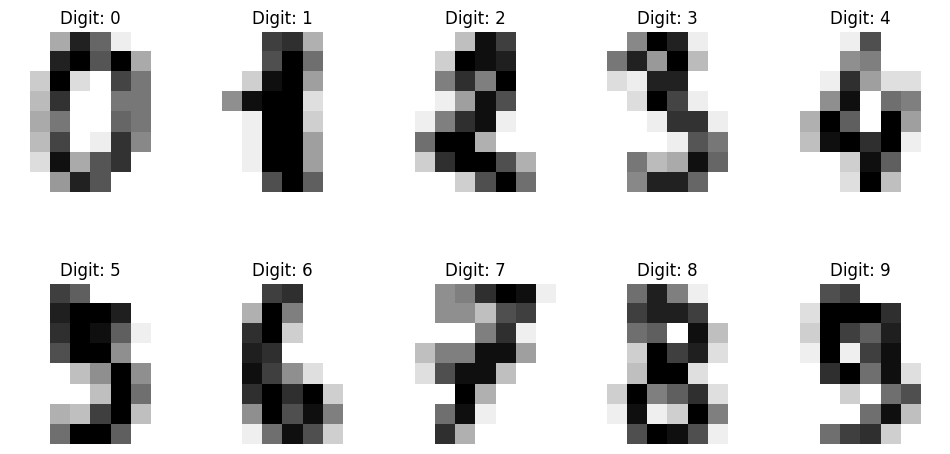

In [3]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i], cmap="binary") 
    plt.title(f"Digit: {y[i]}")  # Using f-string to concatenate the title
    plt.axis('off')
plt.show()

# Converting Train Data into 2D array

In [4]:
# Load data
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Splitting The Data into test and train parts

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Displaying Data

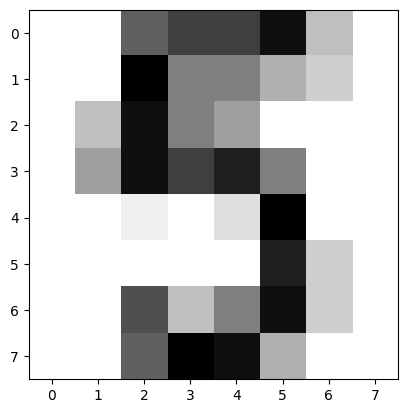

In [6]:
plt.imshow(X_train[30].reshape(8,8),cmap='binary')

# Initializing different-k values in it
# Different Distance

In [7]:
parameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Using KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [9]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.9819202477739063


# Training Model on data

In [10]:
knn_best = KNeighborsClassifier(**grid_search.best_params_)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

# Displaying Model Performance on different k values

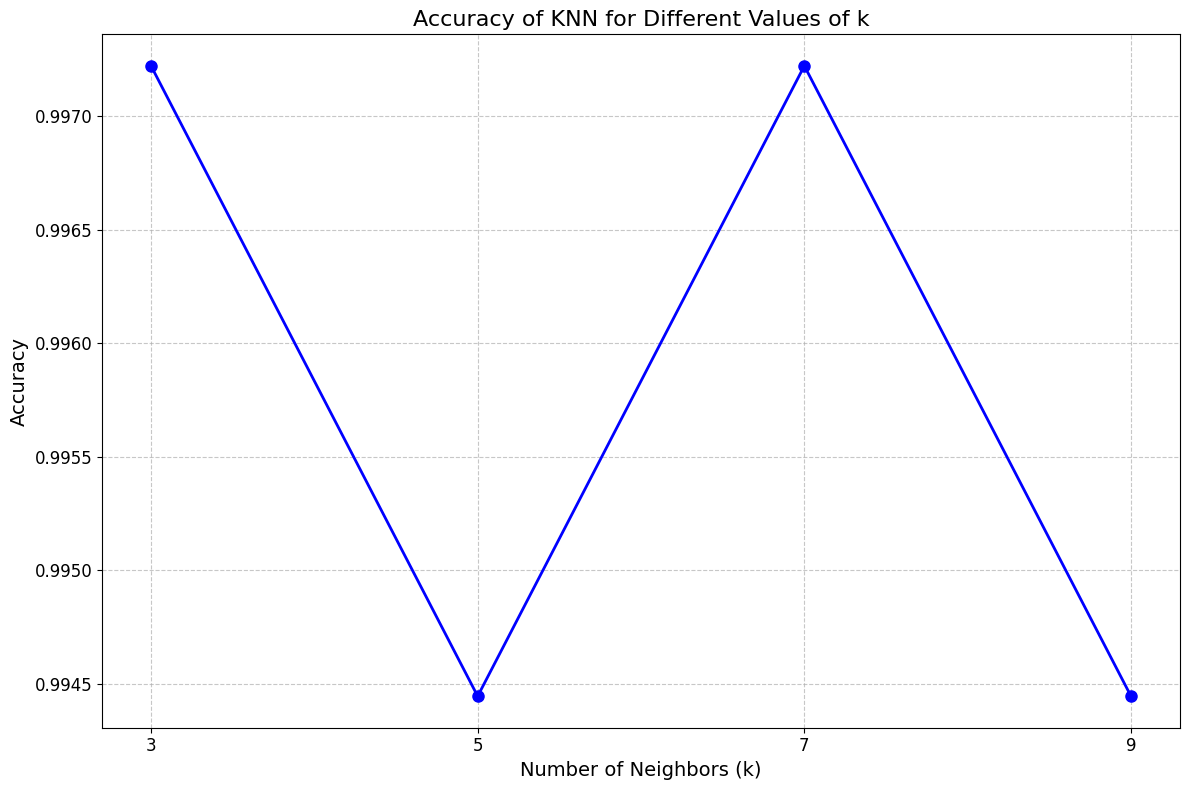

In [11]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Initialize lists to store k values and corresponding accuracies
k_values = []
accuracies = []

# Iterate over parameter combinations
for k in parameters['n_neighbors']:
    knn = KNeighborsClassifier(n_neighbors=k, weights=best_params['weights'], p=best_params['p'])
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracies.append(accuracy)

# Plot the graph with improved aesthetics
plt.figure(figsize=(12, 8))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
plt.title('Accuracy of KNN for Different Values of k', fontsize=16)
plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(k_values, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

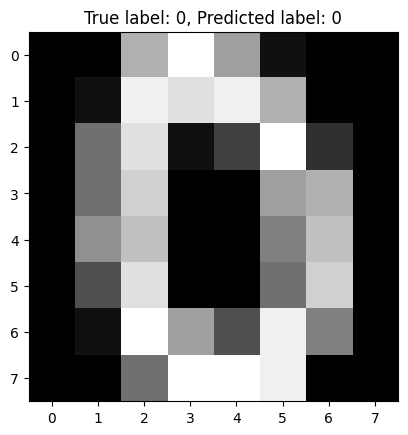

In [12]:
# Send a testing image to the model, get prediction, and visualize it
test_image_index = 0
test_image = X_test[test_image_index]
test_image_label = y_test[test_image_index]
test_image_pred = knn_best.predict(test_image.reshape(1, -1))

plt.imshow(test_image.reshape(8, 8), cmap='gray')
plt.title(f"True label: {test_image_label}, Predicted label: {test_image_pred[0]}")
plt.show()